# **<center>Optimización - Tarea 1</center>**

**Integrantes:**

- Jorge Eduardo Quenta Solis
- Jorge Alexander Leon Villareyes
- Manuel Sebastian Taco Anton


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.optimize import minimize_scalar
from typing import Callable

Revisar: https://github.com/astrumai/DeepLearningWithTF2.0/tree/master/notebooks

04.00 y helpers

## **Ejercicio 1**

Definimos

$$f(x,y) = 100(y-x^2)^2 + (1-x)^2$$

a) Implemente los métodos de
- Descenso máximo
- Gradiente descendiente
para hallar el mínimo de la función con una tolerancia de $10^{-8}$. Considere los puntos iniciales $(2, 10)$ y $(2, 30)$. Muestre el plot del valor de la función e indique cuantas iteraciones fueron necesarias.

In [10]:

# def plot_vector2d(vector2d, origin=[0, 0], **options):
#     return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
#               head_width=0.2, head_length=0.3, length_includes_head=True,
#               **options)

def plot_vector2d(vector2d, origin=[0, 0], ax=None, **options):
    if ax is None:
        ax = plt.gca()  # Obtener el eje actual si no se proporciona uno
    ax.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
             head_width=0.2, head_length=0.3, length_includes_head=True,
             **options)


In [20]:
def f(x: float, y: float) -> float:
    return 100 * (y - x**2)**2 + (1 - x)**2

def grad_f(x: float, y: float) -> np.ndarray:
    
    df_dx = -400 * x * (y - x**2) - 2 * (1 - x)
    df_dy = 200 * (y - x**2)
    
    return np.array([df_dx, df_dy])

def diagrama_contorno(
    f: Callable[[float, float], float],
    xmin: float,
    xmax: float,
    ymin: float,
    ymax: float,
    niveles: list[float]) -> plt.Figure:
    
	x = np.arange(xmin, xmax, 0.02) # límites para x y el tamaño de paso
	y = np.arange(ymin, ymax, 0.02) # límites para y y el tamaño de paso
 
	X,Y= np.meshgrid(x,y)      # almacenamos los valores del grid.
	Z = f(X,Y)

	fig, ax = plt.subplots(1, 1)

	CS=ax.contour(X,Y,Z, levels=niveles,  linewidths=1) # Especificamos los niveles a dibujar.

	ax.clabel(CS, inline=True, fontsize=8)

	plt.close(fig)

	return fig

def diagrama_contorno_con_trayectoria(
    f: Callable[[float, float], float],
    xmin: float,
    xmax: float,
    ymin: float,
    ymax: float,
    niveles: list[float],
    trayectoria: list[np.ndarray]
) -> plt.Figure:
    
    x = np.arange(xmin, xmax, 0.02)
    y = np.arange(ymin, ymax, 0.02)
 
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    fig, ax = plt.subplots(1, 1)

    CS = ax.contour(X, Y, Z, levels=niveles, linewidths=1)
    ax.clabel(CS, inline=True, fontsize=8)

    # Graficar la trayectoria
    trayectoria = np.array(trayectoria)
    ax.plot(trayectoria[:, 0], trayectoria[:, 1], "ro-", ms=1, lw =0.5)  # Línea que conecta los puntos

    # Agregar flechas para ver la dirección del movimiento
    for i in range(1, len(trayectoria)):
        plot_vector2d(trayectoria[i] - trayectoria[i-1], origin=trayectoria[i-1], ax=ax)
    
    plt.close(fig)
    return fig



def descenso_maximo(
	f: Callable[[float, float], float],
	grad_f: Callable[[float, float], np.ndarray],
	x0: np.ndarray,
	tol: float = 1e-8,
	max_iter: int = 1000
) -> np.ndarray:
    
    step_size = tol + 1
    iter_count = 0
    
    trajectory = [x0.copy()]
    
    while (step_size > tol) and (iter_count < max_iter):
        
        def g(alpha: float):
            punto = x0 - alpha * grad_f(x0[0], x0[1])
            return f(punto[0], punto[1])
        
        alpha = minimize_scalar(g).x
        
        x0 = x0 - alpha * grad_f(x0[0], x0[1])
        
        step_size = np.linalg.norm(alpha * grad_f(x0[0], x0[1]))
        
        trajectory.append(x0.copy())
        
        iter_count += 1
        
    if (iter_count == max_iter):
        print("El algortimo no convergió")
    
    x_min = x0
    return [x_min, trajectory, iter_count] 



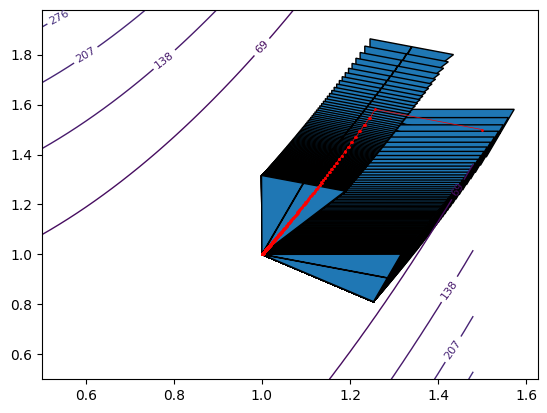

In [21]:
# Parámetros del test
x0 = np.array([1.5, 1.5])  # Punto inicial
tol = 1e-8
max_iter = 1000

# Ejecutar descenso máximo
x_min, trayectoria, iteraciones = descenso_maximo(f, grad_f, x0, tol, max_iter)

# Niveles para el diagrama de contorno
niveles = np.linspace(0, 2000, 30)

# Crear el diagrama de contorno con la trayectoria
fig = diagrama_contorno_con_trayectoria(f, 0.5, 1.5, 0.5, 2, niveles, trayectoria)

# Mostrar la figura
fig


In [15]:
iteraciones, x_min

(941, array([1.00001075, 1.00002155]))

b) Realizar animaciones donde se muestre el diagrama de contorno de la función y se observen los puntos del dominio correspondientes a la secuencia obtenida con ambos métodos de modo que se comparen las trayectorias y rapidez de ambos métodos.	Las animaciones pueden ser GIFs. Presente su trabajo de modo que se pueda apreciar la diferencia entre ambos métodos.

## **Ejercicio 2**

Halle el centro $C=(h, k)$ y el radio $r$ de la mejor circunferencia que aproxima a los puntos $(1.5, 1.5)$, $(1, 4)$, $(4, 6)$, $(6, 4)$ y $(4, 1)$.

En general, dados puntos $(x_i, y_i)$, con $i=1,\ldots,n$ deseamos minimizar una función que mida qué tan cerca los puntos se encuentran de la circunferencia. Consideramos la siguiente función objetivo

$$R(h, k, r) = \sum_{i=1}^n \left[(x_i-h)^2 + (y_i-k)^2 - r^2 \right]^2$$

a) Escriba la función objetivo en el caso de los puntos dados.

In [7]:
puntos = np.array([[1.5, 1.5], [1, 4], [4, 6], [6, 4], [4, 1]])

# Parte a) Definir la función objetivo
def R(h, k, r, puntos):
    """
    Función objetivo que mide el error de ajuste de la circunferencia a los puntos dados.
    """
    return np.sum([(np.sqrt((x - h)**2 + (y - k)**2) - r)**2 for x, y in puntos])

def gradiente_R(h, k, r, puntos):
    """
    Gradiente de la función objetivo respecto a h, k, y r.
    """
    grad_h = np.sum([2 * (np.sqrt((x - h)**2 + (y - k)**2) - r) * (- (x - h) / np.sqrt((x - h)**2 + (y - k)**2)) for x, y in puntos])
    grad_k = np.sum([2 * (np.sqrt((x - h)**2 + (y - k)**2) - r) * (- (y - k) / np.sqrt((x - h)**2 + (y - k)**2)) for x, y in puntos])
    grad_r = np.sum([-2 * (np.sqrt((x - h)**2 + (y - k)**2) - r) for x, y in puntos])
    return np.array([grad_h, grad_k, grad_r])




b) Utilice gradiente descendiente para hallar los valores de $h$ y $r$ que minimizan la función. Empiece por valores elegidos al azar.

In [8]:
# Parte b) Implementación del gradiente descendente
def descenso_gradiente(puntos, h_inicial, k_inicial, r_inicial, tasa_aprendizaje=0.01, tolerancia=1e-6, max_iter=10000):
    """
    Algoritmo de descenso por gradiente para minimizar la función objetivo.
    """
    h, k, r = h_inicial, k_inicial, r_inicial
    for i in range(max_iter):
        gradiente = gradiente_R(h, k, r, puntos)
        h, k, r = h - tasa_aprendizaje * gradiente[0], k - tasa_aprendizaje * gradiente[1], r - tasa_aprendizaje * gradiente[2]
        if np.linalg.norm(gradiente) < tolerancia:
            break
    return h, k, r, i


c) Grafique la circunferencia obtenida y analice sus resultados.

Centro óptimo: (3.4383, 3.4383)
Radio óptimo: 2.5981
Iteraciones necesarias: 257


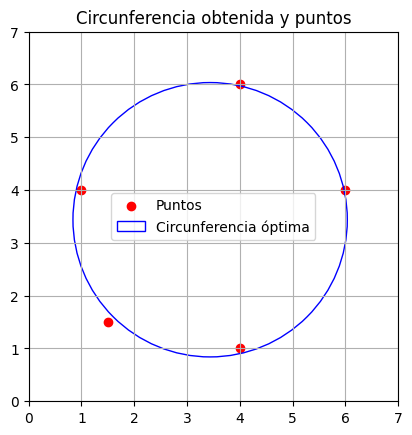

In [9]:
# Parte c) Aplicar gradiente descendente y graficar resultados
h_inicial, k_inicial, r_inicial = 3, 3, 2 # para H, K, R sientanse libres de cambiarlos

h_optimo, k_optimo, r_optimo, iteraciones = descenso_gradiente(puntos, h_inicial, k_inicial, r_inicial)

print(f"Centro óptimo: ({h_optimo:.4f}, {k_optimo:.4f})")
print(f"Radio óptimo: {r_optimo:.4f}")
print(f"Iteraciones necesarias: {iteraciones}")

# Parte c) Graficar la circunferencia obtenida y los puntos
fig, ax = plt.subplots()

ax.scatter(puntos[:, 0], puntos[:, 1], color='red', label='Puntos')

circunferencia = plt.Circle((h_optimo, k_optimo), r_optimo, color='blue', fill=False, label='Circunferencia óptima')
ax.add_artist(circunferencia)

ax.set_xlim(min(puntos[:, 0]) - 1, max(puntos[:, 0]) + 1)
ax.set_ylim(min(puntos[:, 1]) - 1, max(puntos[:, 1]) + 1)

ax.set_aspect('equal', 'box')
plt.title('Circunferencia obtenida y puntos')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# quenta

In [ ]:

def descenso_maximo2(x0, tol=1e-8, max_iter=1000):
    x = np.array(x0)
    trajectory = [x.copy()]
    iter_count = 0
    while np.linalg.norm(grad_f(x[0], x[1])) > tol and iter_count < max_iter:
        grad = grad_f(x[0], x[1])
        step_size = 1e-6
        if np.any(np.isnan(grad)) or np.any(np.isinf(grad)):
            print(f"Numerical instability detected at iteration {iter_count}")
            break
        x = x - step_size * grad
        trajectory.append(x.copy())
        iter_count += 1
    return x, trajectory, iter_count

def gradiente_descendente(x0, tol=1e-8, max_iter=1000):
    x = np.array(x0)
    trajectory = [x.copy()]
    iter_count = 0
    while np.linalg.norm(grad_f(x[0], x[1])) > tol and iter_count < max_iter:
        grad = grad_f(x[0], x[1])
        step_size = 0.0001 / (iter_count + 1)
        if np.any(np.isnan(grad)) or np.any(np.isinf(grad)):
            print(f"Numerical instability detected at iteration {iter_count}")
            break  # Romper el ciclo si el gradiente tiene valores no numéricos
        x = x - step_size * grad
        trajectory.append(x.copy())
        iter_count += 1
    return x, trajectory, iter_count

x0_1 = [2, 10]
x0_2 = [2, 30]

res1_dm, trajectory_max_descent_1, iters1_dm = descenso_maximo(x0_1)
res2_dm, trajectory_max_descent_2, iters2_dm = descenso_maximo(x0_2)

res1_gd, trajectory_grad_desc_1, iters1_gd = gradiente_descendente(x0_1)
res2_gd, trajectory_grad_desc_2, iters2_gd = gradiente_descendente(x0_2)

print(f"Descenso Máximo (2, 10): {iters1_dm} iteraciones")
print(f"Descenso Máximo (2, 30): {iters2_dm} iteraciones")

print(f"Gradiente Descendente (2, 10): {iters1_gd} iteraciones")
print(f"Gradiente Descendente (2, 30): {iters2_gd} iteraciones")

fig, ax = plt.subplots()

x_vals = np.linspace(1.5, 2.5, 200)
y_vals = np.linspace(8, 10, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

contour = ax.contour(X, Y, Z, levels=50, cmap='Blues')
ax.clabel(contour, inline=1, fontsize=10)

ax.set_xlim([1.5, 2.5])
ax.set_ylim([8, 10])

ax.plot(np.array(trajectory_max_descent_1)[:, 0], np.array(trajectory_max_descent_1)[:, 1], 'bo-', label='Descenso Máximo (2,10)')
ax.plot(np.array(trajectory_max_descent_2)[:, 0], np.array(trajectory_max_descent_2)[:, 1], 'bo-', label='Descenso Máximo (2,30)')

ax.plot(np.array(trajectory_grad_desc_1)[:, 0], np.array(trajectory_grad_desc_1)[:, 1], 'ro-', label='Gradiente Descendente (2,10)')
ax.plot(np.array(trajectory_grad_desc_2)[:, 0], np.array(trajectory_grad_desc_2)[:, 1], 'ro-', label='Gradiente Descendente (2,30)')

ax.legend()
plt.title("Trayectorias de los Métodos de Optimización")
plt.show()

# Desde aqui mi animación que debería animarse pero no se anima
def update(frame, line_dm, line_gd, traj_dm, traj_gd):
    line_dm.set_data(traj_dm[:frame, 0], traj_dm[:frame, 1])
    line_gd.set_data(traj_gd[:frame, 0], traj_gd[:frame, 1])
    return line_dm, line_gd

def crear_animacion(traj_dm, traj_gd, nombre_gif):
    fig, ax = plt.subplots()

    contour = ax.contour(X, Y, Z, levels=50, cmap='Blues')
    ax.set_xlim([1.5, 2.5])
    ax.set_ylim([8, 10])

    line_dm, = ax.plot([], [], 'bo-', label='Descenso Máximo', lw=2)
    line_gd, = ax.plot([], [], 'ro-', label='Gradiente Descendente', lw=2)
    ax.legend()

    ani = FuncAnimation(fig, update, frames=len(traj_dm), fargs=(line_dm, line_gd, traj_dm, traj_gd), blit=True, interval=100)
    ani.save(nombre_gif, writer='pillow')
    plt.show()

traj_max_descent_1 = np.array(trajectory_max_descent_1)
traj_grad_desc_1 = np.array(trajectory_grad_desc_1)

crear_animacion(traj_max_descent_1, traj_grad_desc_1, 'trayectorias_2_10.gif')	